### Task is to build a Machine Learning model that will be able to to proactively detect and eliminate threats based on incoming connections thereby selecting the most appropriate network slice, even in case of a network failure.

In [2]:
import numpy as np 
import pandas as pd

# DATA PREPARATION

**Get train and test datasets which are given in data.**

In [3]:
train_dataset = pd.read_csv("train_dataset/train_dataset.csv")
test_dataset = pd.read_csv("test_dataset/test_dataset.csv")

In [4]:
print(f"train dataset shape : {train_dataset.shape}\n test dataset shape : {test_dataset.shape}")
train_dataset.head(5)

train dataset shape : (31583, 17)
 test dataset shape : (31584, 16)


,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2


**Check if any nan data is included in columns.**

In [5]:
print(train_dataset.isna().sum())
print(test_dataset.isna().sum())

LTE/5g Category         0
Time                    0
Packet Loss Rate        0
Packet delay            0
IoT                     0
LTE/5G                  0
GBR                     0
Non-GBR                 0
AR/VR/Gaming            0
Healthcare              0
Industry 4.0            0
IoT Devices             0
Public Safety           0
Smart City & Home       0
Smart Transportation    0
Smartphone              0
slice Type              0
dtype: int64
LTE/5g Category         0
Time                    0
Packet Loss Rate        0
Packet delay            0
IoT                     0
LTE/5G                  0
GBR                     0
Non-GBR                 0
AR/VR/Gaming            0
Healthcare              0
Industry 4.0            0
IoT Devices             0
Public Safety           0
Smart City & Home       0
Smart Transportation    0
Smartphone              0
dtype: int64


# EXPLORATORY DATA ANALYSIS (EDA)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

**'LTE/5g Category' probabilistic distributions.**

([<matplotlib.axis.YTick at 0x7f0e07f525d0>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.01, '0.01'),
  Text(0, 0.02, '0.02'),
  Text(0, 0.03, '0.03'),
  Text(0, 0.04, '0.04'),
  Text(0, 0.05, '0.05')])

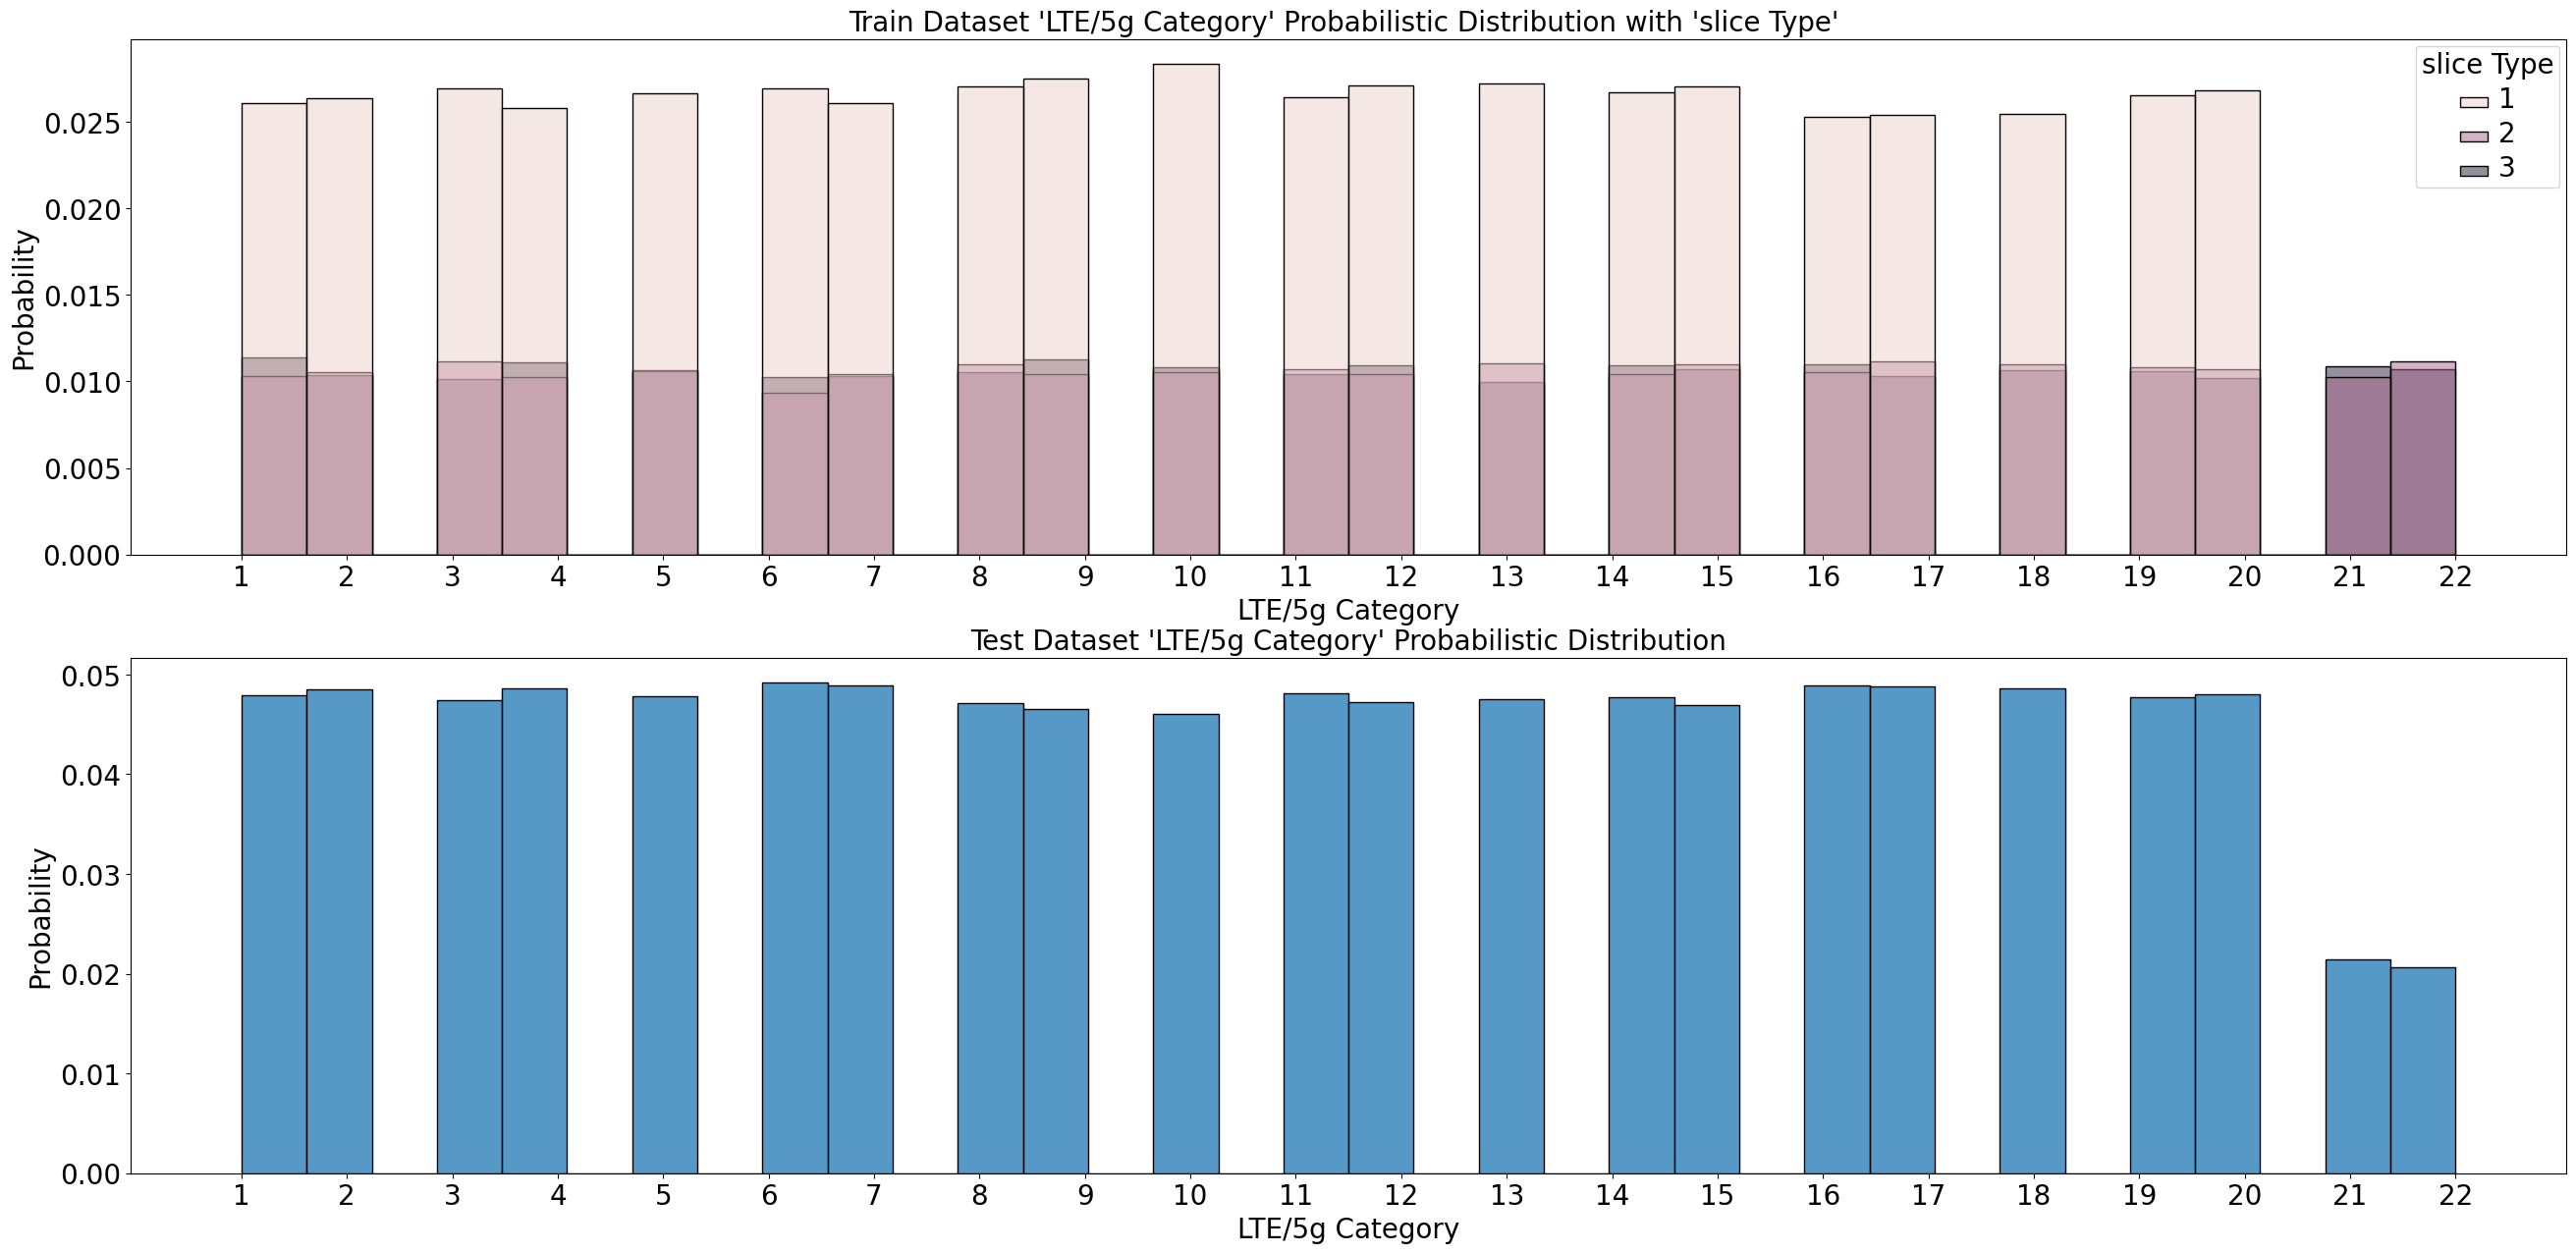

In [7]:
fig = plt.figure(figsize = (32,15))
#For train dataset
plt.subplot(2,1,1)
plt.title("Train Dataset 'LTE/5g Category' Probabilistic Distribution with 'slice Type' ",fontsize =20)
train_lte_hist = sns.histplot(data = train_dataset,x = "LTE/5g Category",stat = "probability",
                              hue = "slice Type")

plt.xticks(train_dataset["LTE/5g Category"].value_counts().index,fontsize = 20)
plt.xlabel("LTE/5g Category",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)
plt.yticks(np.arange(0.000,0.030,0.005),fontsize = 20)

plt.setp(train_lte_hist.get_legend().get_texts(),fontsize = '20')
plt.setp(train_lte_hist.get_legend().get_title(),fontsize = '20')
#For test dataset
plt.subplot(2,1,2)
plt.title("Test Dataset 'LTE/5g Category' Probabilistic Distribution",fontsize =20)
sns.histplot(data = test_dataset,x = "LTE/5g Category",stat = "probability")

plt.xticks(test_dataset["LTE/5g Category"].value_counts().index,fontsize = 20)
plt.xlabel("LTE/5g Category",fontsize = 20)
plt.ylabel("Probability",fontsize = 20)
plt.yticks(np.arange(0.00,0.06,0.01),fontsize = 20)



**Time feature with slice type.**

<Axes: title={'center': "Train dataset 'Time' feature with 'slice Type' "}, xlabel='Time', ylabel='slice Type'>

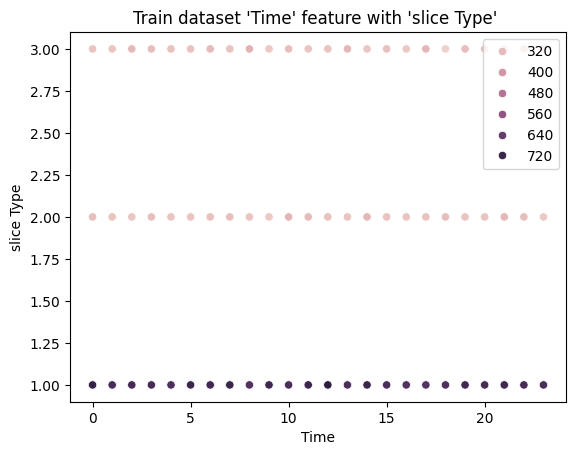

In [8]:
plt.title("Train dataset 'Time' feature with 'slice Type' ")

time_slice_type = pd.concat([train_dataset["Time"],train_dataset["slice Type"]],axis = 1)
time = time_slice_type.value_counts().index.get_level_values(0)
slice_type = time_slice_type.value_counts().index.get_level_values(1)

sns.scatterplot(x = time,y = slice_type,hue = time_slice_type.value_counts().values)

count    31583.000000
mean        11.476459
std          6.915643
min          0.000000
25%          6.000000
50%         11.000000
75%         17.000000
max         23.000000
Name: Time, dtype: float64


Text(0, 0.5, 'Time')

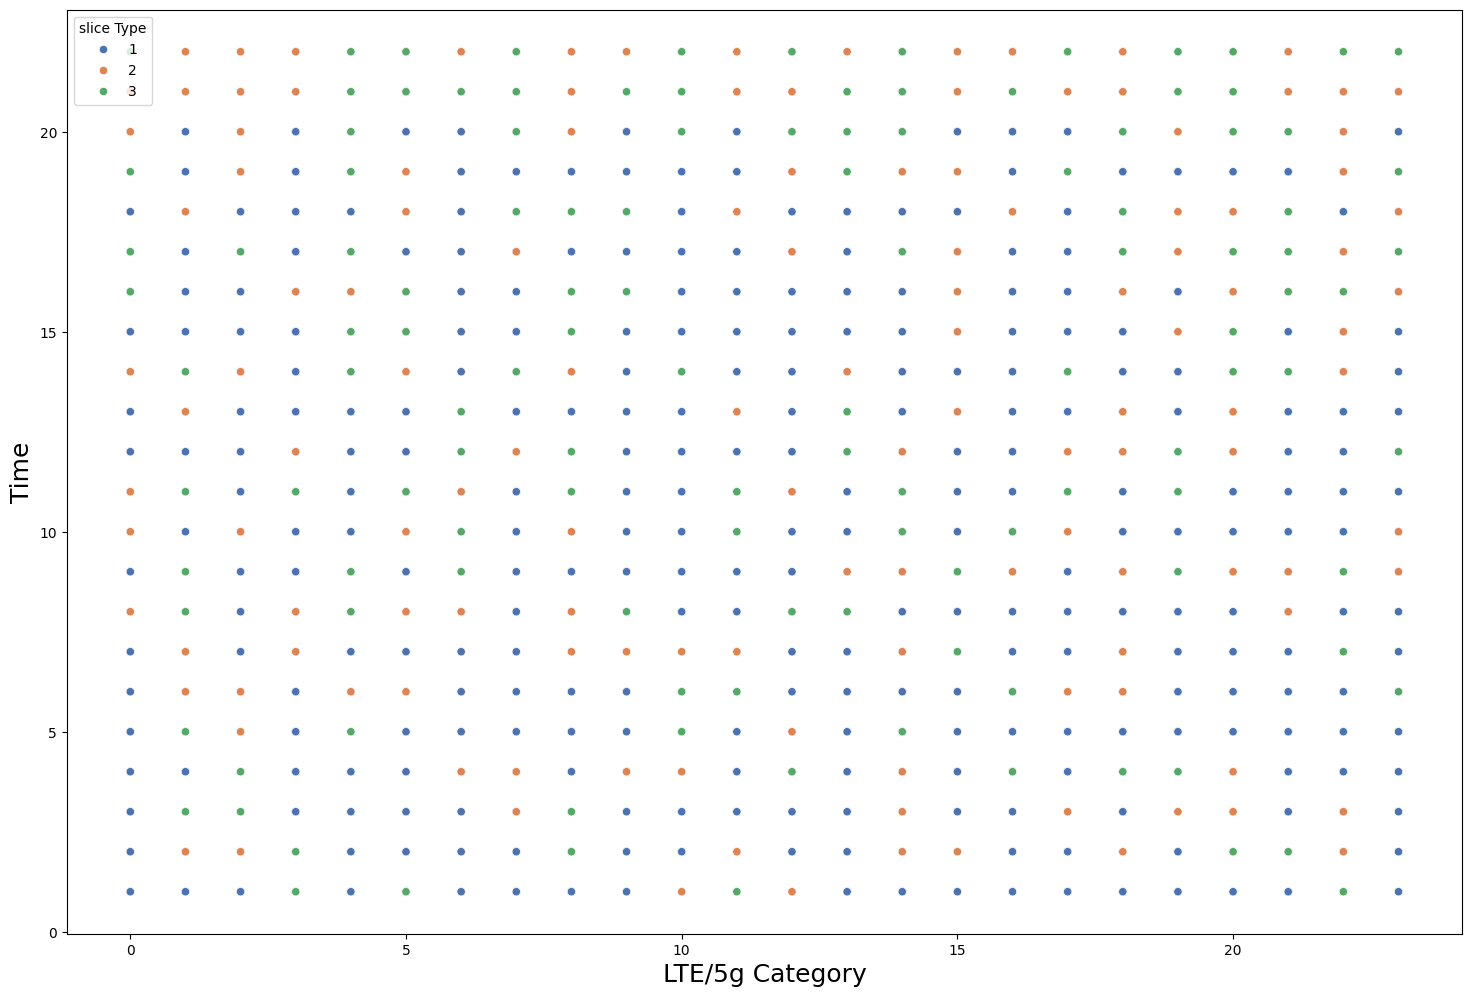

In [9]:
print(train_dataset["Time"].describe())

plt.figure(figsize = (18,12))
sns.scatterplot(data = train_dataset,x = "Time", y= "LTE/5g Category",hue = "slice Type",
                palette = "deep")


plt.xlabel("LTE/5g Category",fontsize = 18)
plt.ylabel("Time",fontsize = 18)

**Packet loss rate**

Text(0, 0.5, 'Probability')

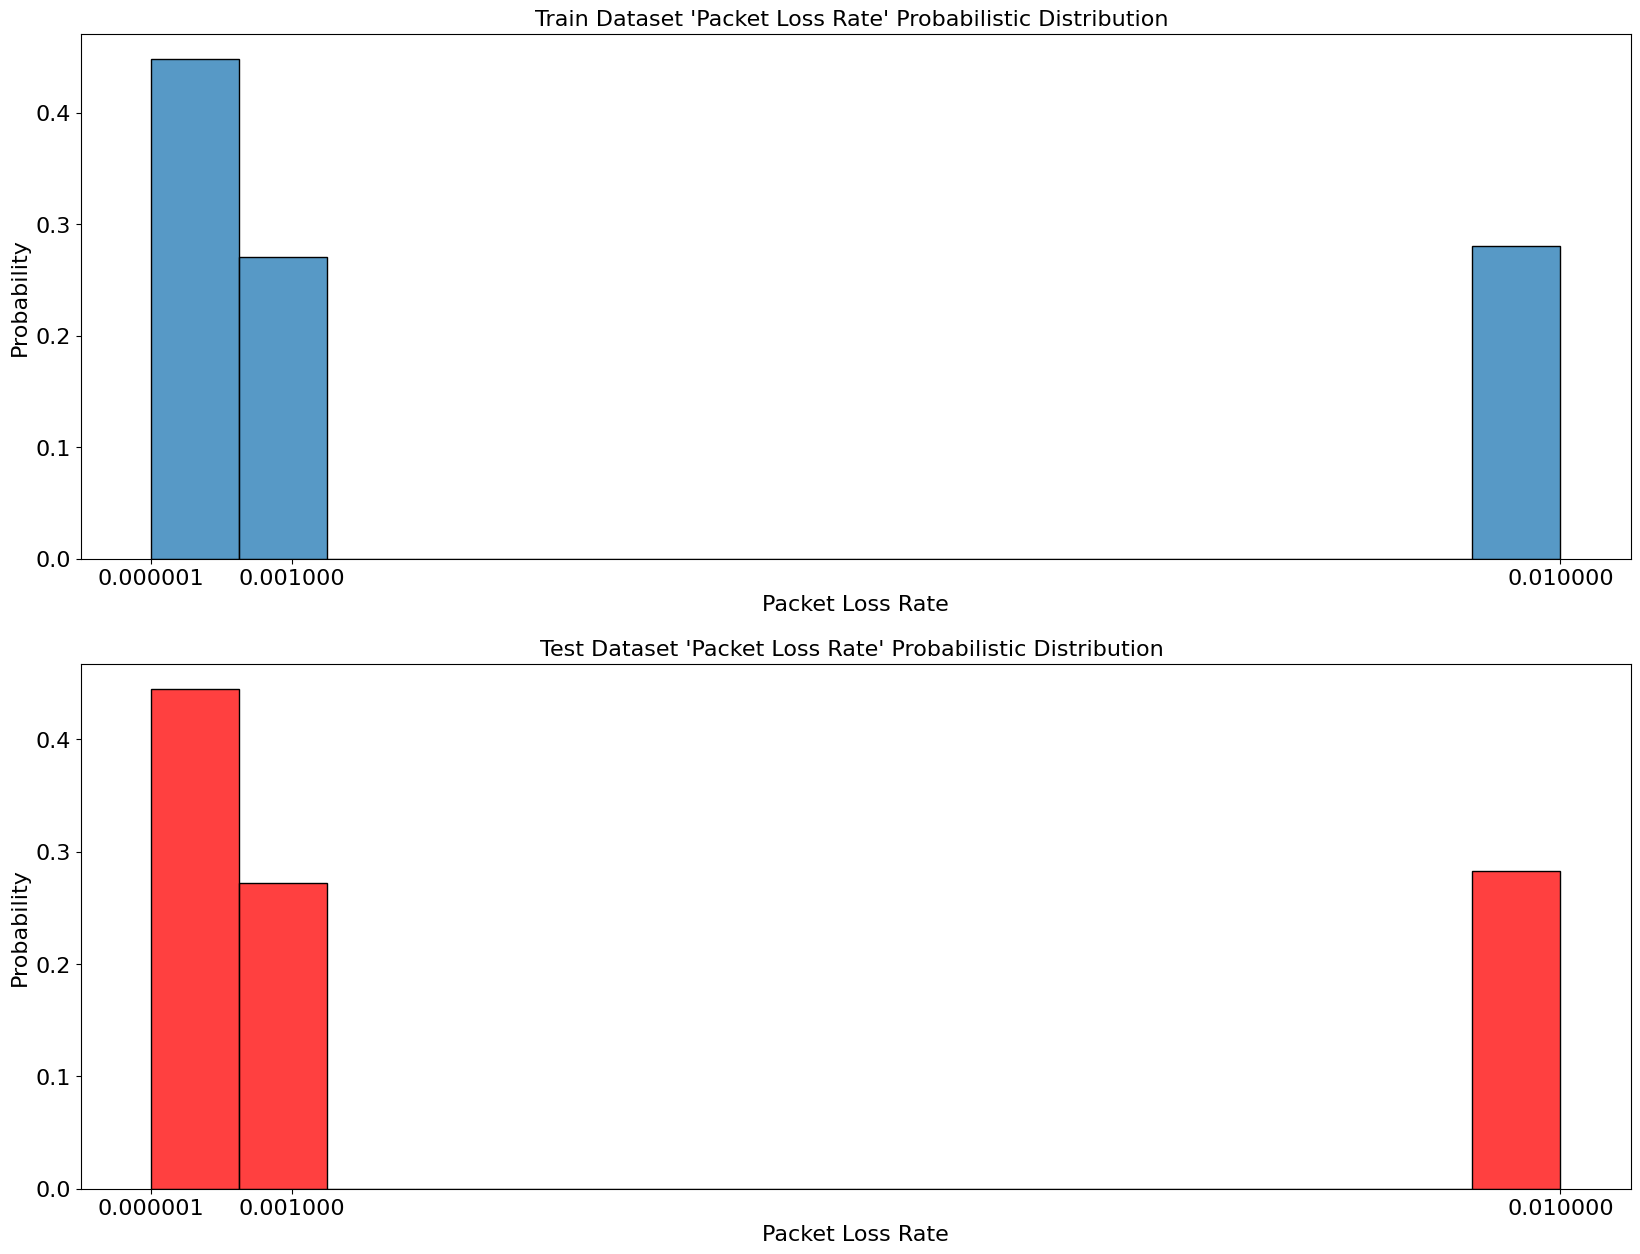

In [10]:
fig = plt.figure(figsize = (20,15))
#For train dataset
plt.subplot(2,1,1)
plt.title("Train Dataset 'Packet Loss Rate' Probabilistic Distribution ",fontsize =16)
train_lte_hist = sns.histplot(data = train_dataset,x = "Packet Loss Rate",stat = "probability")

plt.xticks(train_dataset["Packet Loss Rate"].value_counts().index,fontsize = 16)
plt.yticks(np.arange(0,0.5,0.1),fontsize = 16)
plt.xlabel("Packet Loss Rate",fontsize = 16)
plt.ylabel("Probability",fontsize = 16)

#For test dataset
plt.subplot(2,1,2)
plt.title("Test Dataset 'Packet Loss Rate' Probabilistic Distribution ",fontsize =16)
train_lte_hist = sns.histplot(data = test_dataset,x = "Packet Loss Rate",stat = "probability",
                             color = "red")

plt.xticks(test_dataset["Packet Loss Rate"].value_counts().index,fontsize = 16)
plt.yticks(np.arange(0,0.5,0.1),fontsize = 16)
plt.xlabel("Packet Loss Rate",fontsize = 16)
plt.ylabel("Probability",fontsize = 16)

Text(0, 0.5, 'Count')

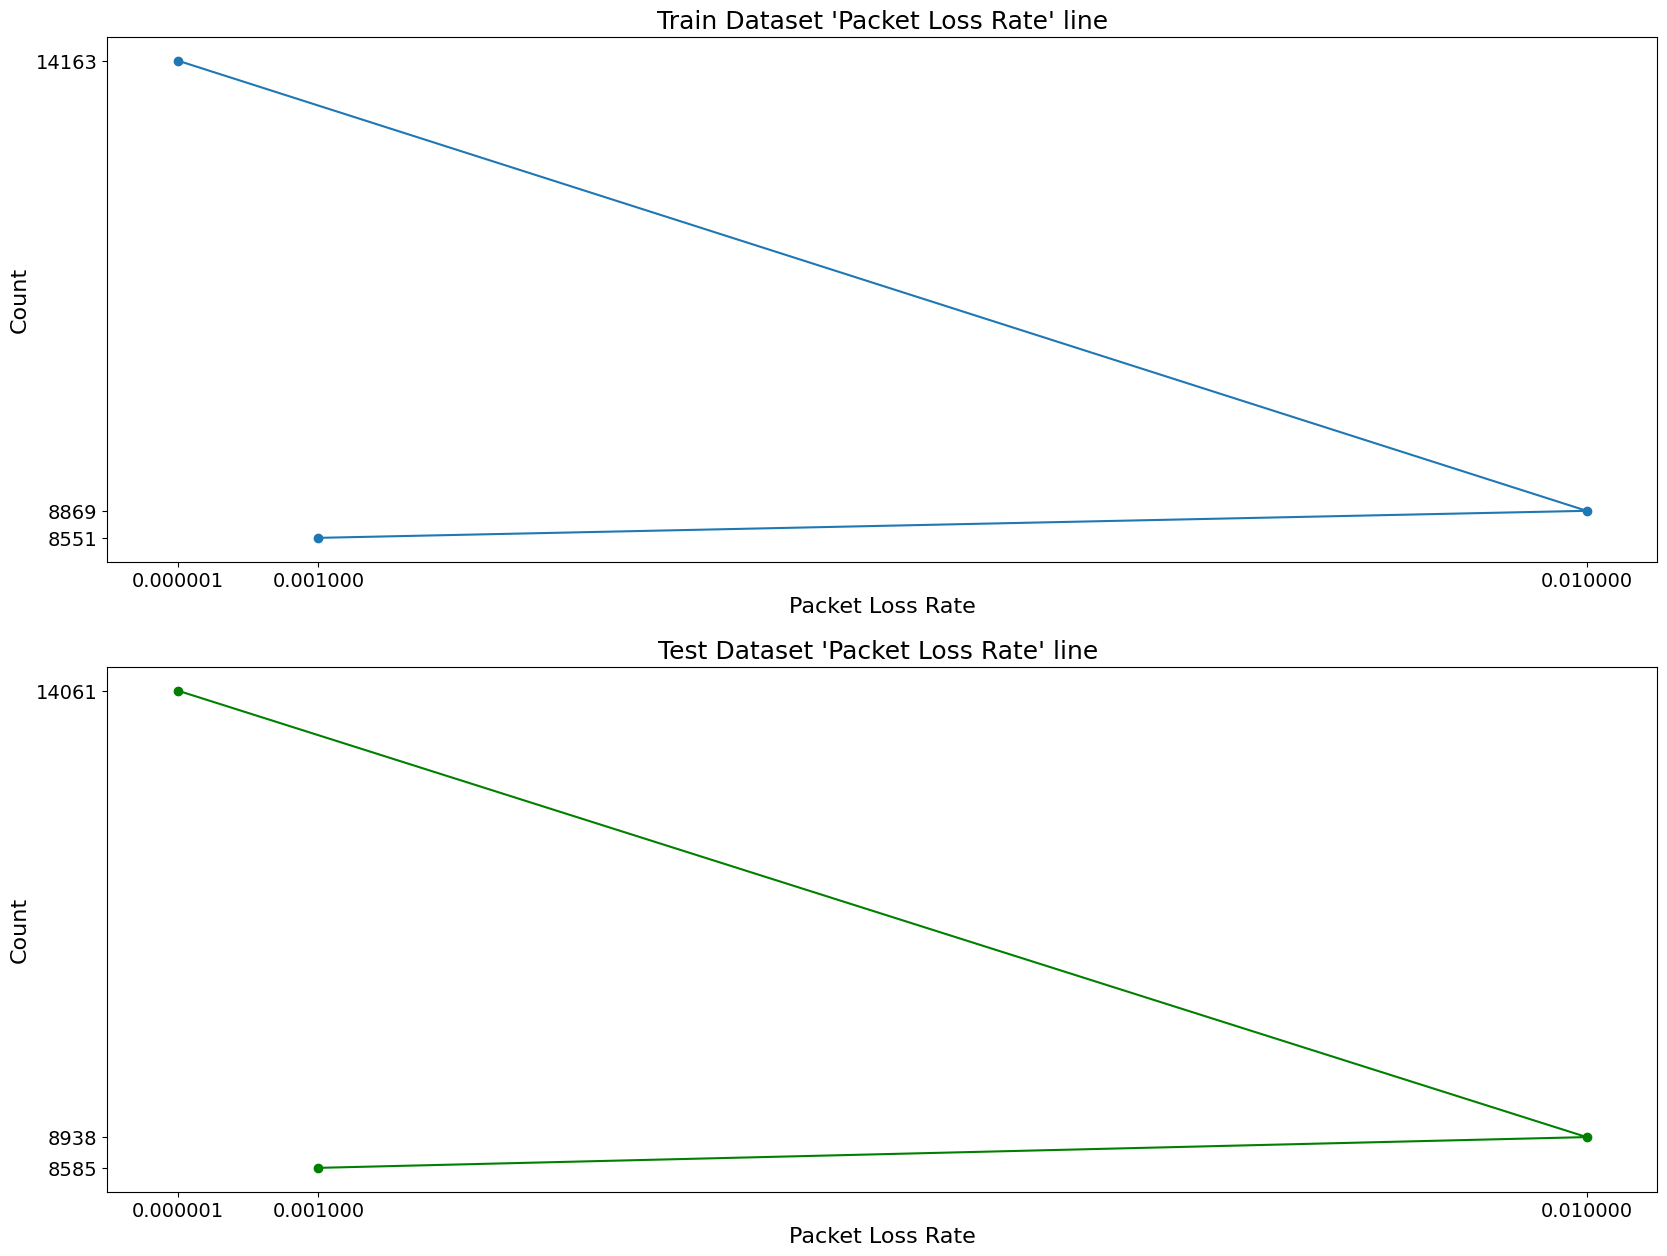

In [11]:
plt.figure(figsize = (20,15))
#For train dataset
plt.subplot(2,1,1)

plt.title("Train Dataset 'Packet Loss Rate' line",fontsize = 18)
plt.plot(train_dataset["Packet Loss Rate"].value_counts(),marker = "o")
plt.xticks(train_dataset["Packet Loss Rate"].unique(),fontsize = 14)
plt.yticks(train_dataset["Packet Loss Rate"].value_counts(),fontsize = 14)

plt.xlabel("Packet Loss Rate",fontsize = 16)
plt.ylabel("Count",fontsize = 16)
#For test dataset
plt.subplot(2,1,2)

plt.title("Test Dataset 'Packet Loss Rate' line ",fontsize = 18)
plt.plot(test_dataset["Packet Loss Rate"].value_counts(),marker = "o",color = "green")
plt.xticks(test_dataset["Packet Loss Rate"].unique(),fontsize = 14)
plt.yticks(test_dataset["Packet Loss Rate"].value_counts(),fontsize = 14)

plt.xlabel("Packet Loss Rate",fontsize = 16)
plt.ylabel("Count",fontsize = 16)


In [12]:
train_dataset.head(3)

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1


<Axes: title={'center': "Train Dataset 'Packet delay' with respect to 'Smartphone' feature"}, xlabel='Packet delay', ylabel='Probability'>

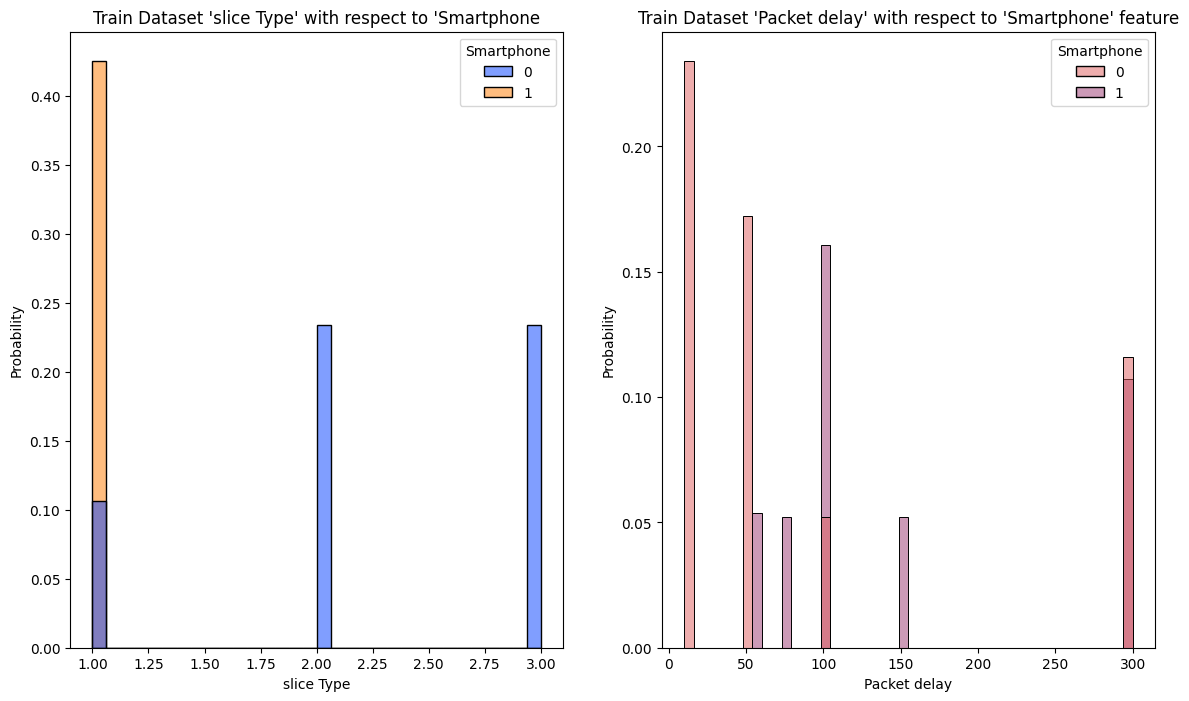

In [13]:
plt.figure(figsize = (14 ,8))
#For Train Dataset 'slice Type' with respect to 'Smartphone' feature.
plt.subplot(1,2,1)
plt.title("Train Dataset 'slice Type' with respect to 'Smartphone")
sns.histplot(data = train_dataset,x = "slice Type",hue = "Smartphone",stat = "probability",
            palette = "bright",alpha = 0.5)
#For Train Dataset 'Packet delay' with respect to 'Smartphone' feature.
plt.subplot(1,2,2)
plt.title("Train Dataset 'Packet delay' with respect to 'Smartphone' feature")
sns.histplot(data = train_dataset,x = "Packet delay",hue = "Smartphone",stat = "probability",
            palette = "flare",alpha = 0.5)


In [14]:
print(train_dataset)

       LTE/5g Category  Time  Packet Loss Rate  Packet delay  IoT  LTE/5G  \
0                   14     0          0.000001            10    1       0   
1                   18    20          0.001000           100    0       1   
2                   17    14          0.000001           300    0       1   
3                    3    17          0.010000           100    0       1   
4                    9     4          0.010000            50    1       0   
...                ...   ...               ...           ...  ...     ...   
31578               14    23          0.010000           100    0       1   
31579               12     7          0.010000            50    1       0   
31580               18     5          0.010000           300    1       0   
31581                8     1          0.000001            10    1       0   
31582               20    20          0.000001            10    1       0   

       GBR  Non-GBR  AR/VR/Gaming  Healthcare  Industry 4.0  IoT Devices  \

<Axes: title={'center': "Train Dataset 'LTE/5g Category' with respect to 'Smartphone' feature"}, xlabel='LTE/5g Category', ylabel='Probability'>

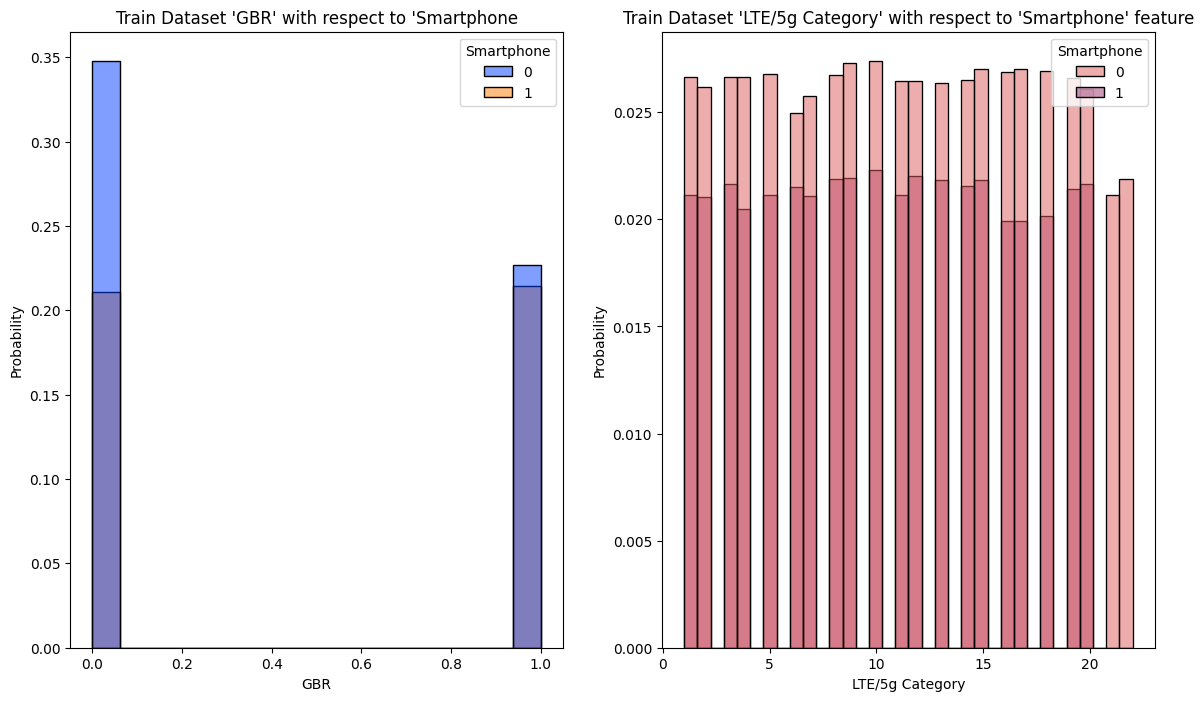

In [15]:
plt.figure(figsize = (14 ,8))
#For Train Dataset 'GBR' with respect to 'Smartphone' feature.
plt.subplot(1,2,1)
plt.title("Train Dataset 'GBR' with respect to 'Smartphone")
sns.histplot(data = train_dataset,x = "GBR",hue = "Smartphone",stat = "probability",
            palette = "bright",alpha = 0.5)
#For Train Dataset 'Packet delay' with respect to 'Smartphone' feature.
plt.subplot(1,2,2)

plt.title("Train Dataset 'LTE/5g Category' with respect to 'Smartphone' feature")
sns.histplot(data = train_dataset,x = "LTE/5g Category",hue = "Smartphone",stat = "probability",
            palette = "flare",alpha = 0.5)

# Feature Extraction

**Correlation matrix.**

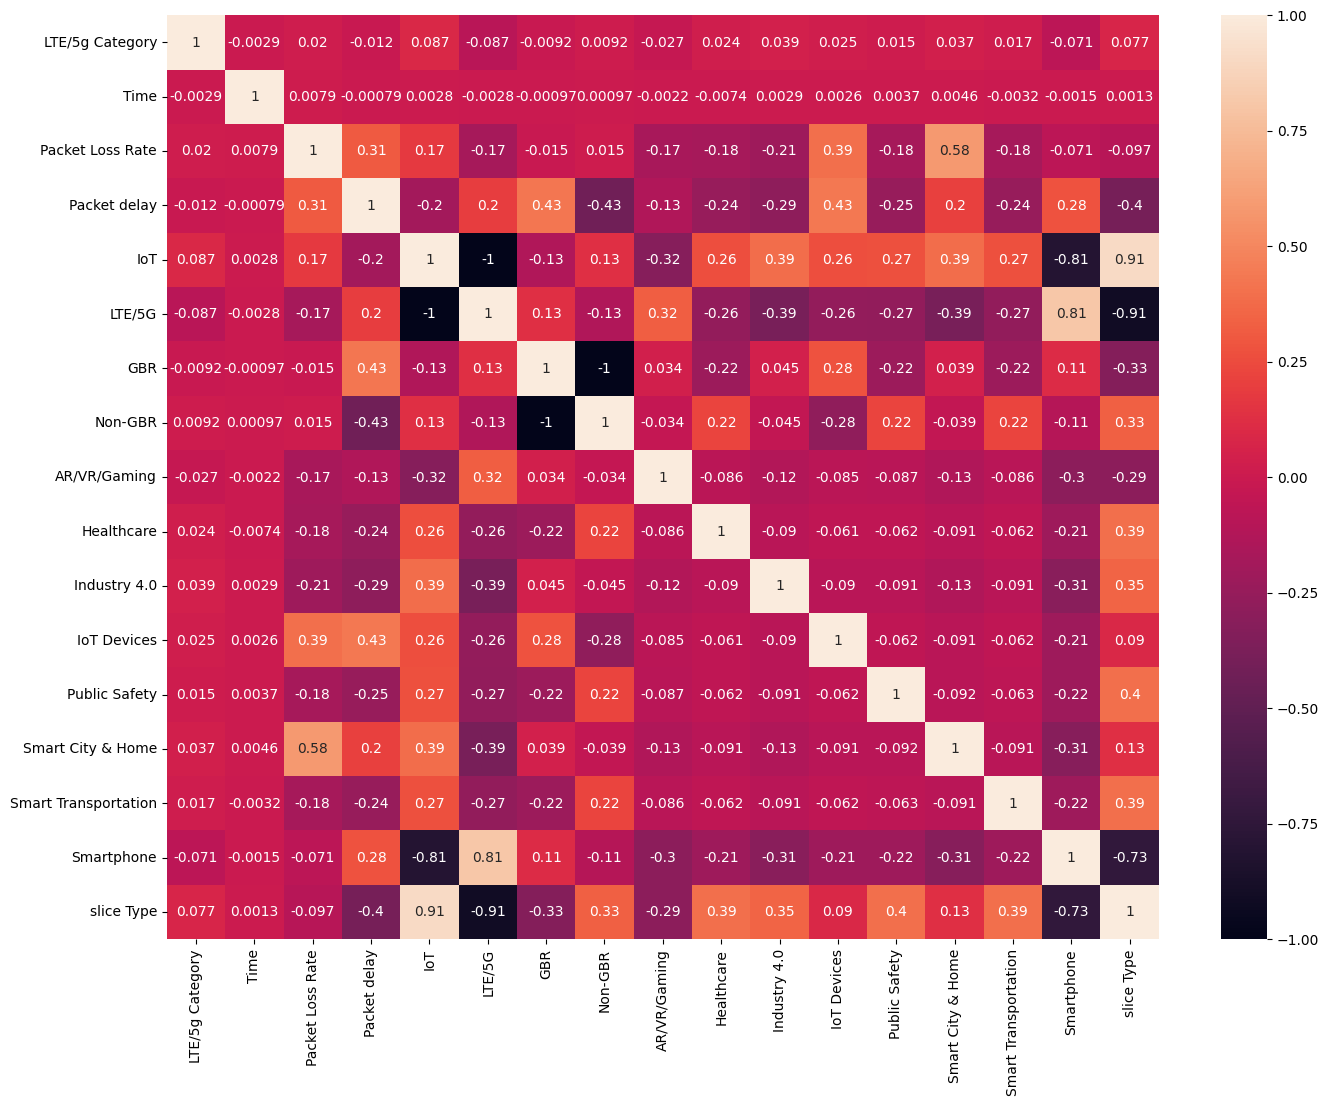

In [16]:
corr_results = train_dataset.corr()
fig = plt.figure(figsize = (16,12))

sns.heatmap(corr_results,annot = True)
plt.show()

**Things to extract features :**

**(1) Remove 'Time' feature. Reason => It has too small correlation coefficent.**

**(2)Remove 'IoT' feature. Reason => It's and 'LTE/5g Category'  have inverted correlation coefficents of each other.**

**(3)Remove 'Non-GBR' feature. Reason => GBR feature is inverted identical of Non-GBR feature so there is no need to keep it.**


In [17]:
train_dataset.drop(columns = ["Time","IoT"],inplace = True)
test_dataset.drop(columns = ["Time","IoT"],inplace = True)

In [18]:
train_dataset.head(5)

,LTE/5g Category,Packet Loss Rate,Packet delay,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0.000001,10,0,0,1,0,0,0,0,1,0,0,0,3
1,18,0.001000,100,1,1,0,1,0,0,0,0,0,0,0,1
2,17,0.000001,300,1,0,1,0,0,0,0,0,0,0,1,1
3,3,0.010000,100,1,0,1,0,0,0,0,0,0,0,1,1
4,9,0.010000,50,0,0,1,0,0,0,0,0,1,0,0,2


In [19]:
test_dataset.head(5)

,LTE/5g Category,Packet Loss Rate,Packet delay,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,15,0.001000,100,1,1,0,1,0,0,0,0,0,0,0
1,14,0.000001,10,0,0,1,0,0,0,0,0,0,1,0
2,11,0.001000,50,0,1,0,0,0,1,0,0,0,0,0
3,20,0.001000,50,0,1,0,0,0,1,0,0,0,0,0
4,2,0.001000,50,1,0,1,1,0,0,0,0,0,0,0


# DATA PREPROCESSING 

In [20]:
import keras

def label_processing(df):
    #No Standartization because the features are classification datas.
    target_y_dash = df.iloc[:,-1:].values
    target_y = keras.utils.to_categorical(target_y_dash)
    return target_y, target_y_dash

2024-05-20 02:02:48.606925: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
#Get the processed y labels
train_y, train_y_dash = label_processing(train_dataset)

In [22]:
print(train_dataset.iloc[:,-1:].values.shape)
print(train_y)

(31583, 1)
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


# TRAIN AND VALIDATION SPLITTING

In [23]:
#%60 for train, %28 for val, %12 for test
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(train_dataset.iloc[:,:-1],train_y,random_state=43,
                                                  test_size= 0.4)

X_train_dash,X_val_dash,Y_train_dash,Y_val_dash = train_test_split(train_dataset.iloc[:,:-1],train_y_dash,random_state=43,
                                                  test_size= 0.4)

In [24]:
print(f"{X_train.shape} , {X_val.shape}")

(18949, 14) , (12634, 14)


In [25]:
#Split test and val dataset.
X_val,X_test,Y_val,Y_test = train_test_split(X_val,Y_val,random_state = 43,test_size = 0.3)
X_val_dash,X_test_dash,Y_val_dash,Y_test_dash = train_test_split(X_val_dash,Y_val_dash,random_state = 43,test_size = 0.3)

In [26]:
print(f"{X_train.shape}, {X_test.shape}, {X_val.shape}")

(18949, 14), (3791, 14), (8843, 14)


# SVM

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
def train_svm(X_train, Y_train):
    model = SVC()
    model.fit(X_train,Y_train)
    return model
# print(Y_train_dash.ravel().shape)
svm_model = train_svm(X_train_dash,(Y_train_dash.ravel()))


val_predictions = svm_model.predict(X_val_dash)
val_accuracy = accuracy_score(Y_val_dash, val_predictions)
print("Validation Accuracy:", val_accuracy)

X_train_combined = np.concatenate((X_train_dash, X_val_dash))
y_train_combined = np.concatenate((Y_train_dash, Y_val_dash))
svm_model.fit(X_train_combined, y_train_combined)

# Test the final SVM model on the test set
test_predictions = svm_model.predict(X_test_dash)
test_accuracy = accuracy_score(Y_test_dash, test_predictions)
print("Test Accuracy:", test_accuracy)


Validation Accuracy: 0.8674657921519846


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Test Accuracy: 0.9195462938538644


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

def train_knn(X_train, Y_train, n_neighbors= 5):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, Y_train)
    return model


knn_model = train_knn(X_train_dash, (Y_train_dash.ravel()))

val_predictions = knn_model.predict(X_val_dash)
val_accuracy = accuracy_score(Y_val_dash, val_predictions)
print("Validation Accuracy:", val_accuracy)

X_train_combined = np.concatenate((X_train_dash, X_val_dash))
y_train_combined = np.concatenate((Y_train_dash, Y_val_dash))
knn_model.fit(X_train_combined, y_train_combined)

test_predictions = knn_model.predict(X_test_dash)
test_accuracy = accuracy_score(Y_test_dash, test_predictions)
print("Test Accuracy:", test_accuracy)


Validation Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Test Accuracy: 1.0


# DEEP NEURAL NETWORK

In [29]:
from keras.layers import Conv1D, ConvLSTM1D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential
def build_model():
    model = Sequential()
    #Input layer
    model.add(Dense(8,activation = "relu",kernel_initializer = "normal",input_dim = 14))
    #Hidden layer 1
    model.add(Dense(16,activation = "relu",kernel_initializer = "normal"))
    #Dropout and Batch Normalization 1
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    #Hidden layer 2
    model.add(Dense(32,activation = "relu",kernel_initializer = "normal"))
    #Dropout and Batch Normalization 2
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    #Flatten
    model.add(Flatten())
    #Fully connected layer
    model.add(Dense(32,activation = "relu",kernel_initializer = "normal"))
    #Output layer
    model.add(Dense(4,activation = "softmax",kernel_initializer = "normal"))
    return model

In [30]:
import tensorflow as tf
import keras

In [31]:
from keras.layers import Conv1D,ConvLSTM1D,Flatten,Dense,BatchNormalization
from keras.models import Sequential
def conv_model():
    model = Sequential()
    # Input layer
    model.add(Conv1D(8, 3, activation="relu", kernel_initializer="normal", input_shape=(14, 1)))
    # Hidden layer 1
    model.add(Conv1D(16, 3, activation="relu", kernel_initializer="normal"))
    # Dropout and Batch Normalization 1
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    # Hidden layer 2
    model.add(Conv1D(32, 3, activation="relu", kernel_initializer="normal"))
    # Dropout and Batch Normalization 2
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    # Flatten
    model.add(Flatten())
    # Fully connected layer
    model.add(Dense(32, activation="relu", kernel_initializer="normal"))
    # Output layer
    model.add(Dense(4, activation="softmax", kernel_initializer="normal"))
    return model


In [32]:
model = build_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-20 02:03:47.496717: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 02:03:47.738657: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 02:03:47.738755: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have bee

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,188 (8.55 KB)

 Trainable params: 2,092 (8.17 KB)

 Non-trainable params: 96 (384.00 B)

**COMPILE MODEL**

In [33]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
             loss = "categorical_crossentropy",metrics = ["accuracy"])

In [34]:
#Add dimension for convolution.
X_train = np.expand_dims(X_train,axis = -1)
X_val = np.expand_dims(X_val,axis = -1)

In [35]:
print(X_val.shape)

(8843, 14, 1)


**TRAIN MODEL**

In [36]:
history = model.fit(X_train,Y_train,batch_size = 64,epochs = 20,
                         validation_data=(X_val,Y_val),
          callbacks = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3))

Epoch 1/20


I0000 00:00:1716170632.226283  588861 service.cc:145] XLA service 0x117c8010 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716170632.226573  588861 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2024-05-20 02:03:52.408520: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-20 02:03:53.080945: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


 29/297 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4387 - loss: 1.3483

I0000 00:00:1716170642.015218  588861 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


297/297 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.7168 - loss: 0.8096 - val_accuracy: 0.7131 - val_loss: 0.6102
Epoch 2/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9523 - loss: 0.1297 - val_accuracy: 1.0000 - val_loss: 0.0225
Epoch 3/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9868 - loss: 0.0449 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 4/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9824 - loss: 0.0581 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 5/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9909 - loss: 0.0326 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 6/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9894 - loss: 0.0401 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 7/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9928 - loss: 0.0251 - val_accuracy: 1.0000 - val_loss: 0.0013


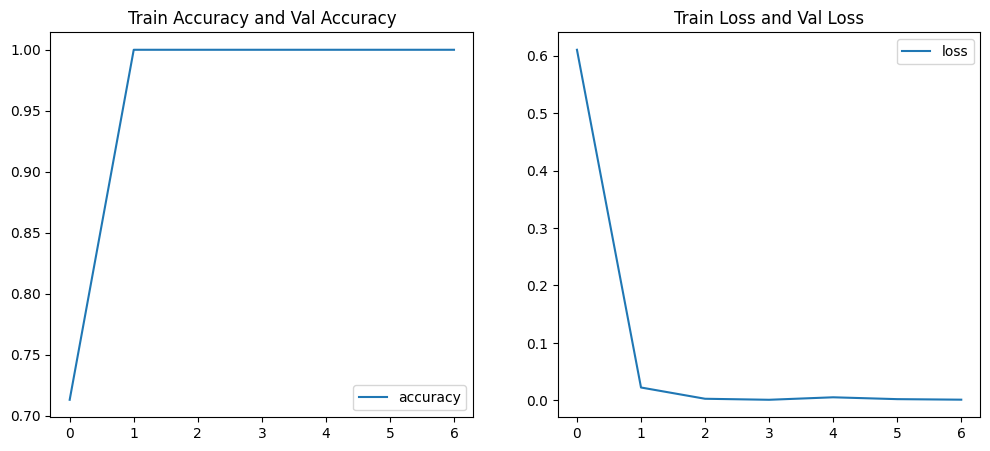

In [37]:
fig = plt.figure(figsize = (12,5))

epochs = len(history.history["accuracy"])
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.title("Train Accuracy and Val Accuracy")
# plt.plot(range(epochs),history.history["accuracy"])
plt.plot(range(epochs),history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])

plt.subplot(1,2,2)
plt.title("Train Loss and Val Loss")
# plt.plot(range(epochs),history.history["loss"])
plt.plot(range(epochs),history.history["val_loss"])
plt.legend(["loss","val_loss"])


# PREDICTION

In [38]:
#Evaluation of model on test dataset.
# model.evaluate(X_test,Y_test)

In [39]:
#Prediction on X_test
preds_X_test = model.predict(X_test)
#Decode Y_test and predictions on X_test
Y_test = [np.argmax(Y_test[i]) for i in range(len(Y_test))]
preds_X_test_decoded = [np.argmax(preds_X_test[i]) for i in range(len(preds_X_test))]

119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step


In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,preds_X_test_decoded))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2061
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       863

    accuracy                           1.00      3791
   macro avg       1.00      1.00      1.00      3791
weighted avg       1.00      1.00      1.00      3791



In [41]:
preds = model.predict(test_dataset)
print(preds)

987/987 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[[8.0165128e-06 9.9974626e-01 2.4428920e-04 1.4547453e-06]
 [3.3859698e-05 7.0532842e-04 3.4344061e-03 9.9582630e-01]
 [2.5825715e-05 1.2882064e-03 9.9852139e-01 1.6459002e-04]
 ...
 [3.5735953e-05 6.4689649e-04 4.8951656e-03 9.9442220e-01]
 [1.7318076e-06 9.9995446e-01 4.3529861e-05 2.5402221e-07]
 [3.5735953e-05 6.4689649e-04 4.8951656e-03 9.9442220e-01]]


In [42]:
#Decode predictions.
preds_decoded = [np.argmax(preds[i]) for i in range(len(preds))]

In [43]:
test_dataset["predicted_slice_type"] = preds_decoded

In [44]:
test_dataset

,LTE/5g Category,Packet Loss Rate,Packet delay,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,predicted_slice_type
0,15,0.001000,100,1,1,0,1,0,0,0,0,0,0,0,1
1,14,0.000001,10,0,0,1,0,0,0,0,0,0,1,0,3
2,11,0.001000,50,0,1,0,0,0,1,0,0,0,0,0,2
3,20,0.001000,50,0,1,0,0,0,1,0,0,0,0,0,2
4,2,0.001000,50,1,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31579,9,0.000001,10,0,0,1,0,0,0,0,0,0,1,0,3
31580,20,0.000001,10,0,0,1,0,0,1,0,0,0,0,0,3
31581,8,0.000001,10,0,0,1,0,0,1,0,0,0,0,0,3
31582,13,0.010000,75,1,0,1,0,0,0,0,0,0,0,1,1


In [45]:
model = conv_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 12, 8)          │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 10, 16)         │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 16)         │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 8, 32)          │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,548 (41.20 KB)

 Trainable params: 10,452 (40.83 KB)

 Non-trainable params: 96 (384.00 B)

In [46]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
             loss = "categorical_crossentropy",metrics = ["accuracy"])

In [47]:
history = model.fit(X_train,Y_train,batch_size = 64,epochs = 20,
                         validation_data=(X_val,Y_val),
          callbacks = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3))

Epoch 1/20
296/297 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7988 - loss: 0.5002

297/297 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.7996 - loss: 0.4981 - val_accuracy: 0.7647 - val_loss: 0.5236
Epoch 2/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9994 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 9.5222e-04
Epoch 3/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 5.5194e-04 - val_accuracy: 1.0000 - val_loss: 1.4589e-05
Epoch 4/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 2.2392e-04 - val_accuracy: 1.0000 - val_loss: 9.8758e-06
Epoch 5/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 2.0436e-04 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 6/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 6.3846e-06
Epoch 7/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 1.6778e-04 - val_accuracy: 1.0000 - val_loss: 7.0044e-06
Epoch 8/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9999 - loss

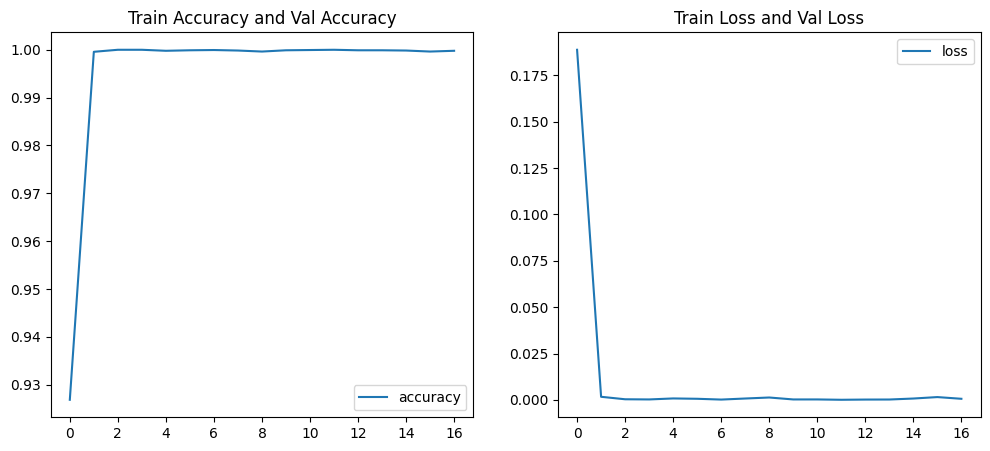

In [48]:
fig = plt.figure(figsize = (12,5))

epochs = len(history.history["accuracy"])
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.title("Train Accuracy and Val Accuracy")
plt.plot(range(epochs),history.history["accuracy"])
# plt.plot(range(epochs),history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])

plt.subplot(1,2,2)
plt.title("Train Loss and Val Loss")
plt.plot(range(epochs),history.history["loss"])
# plt.plot(range(epochs),history.history["val_loss"])
plt.legend(["loss","val_loss"])


In [49]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,preds_X_test_decoded))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2061
           2       1.00      1.00      1.00       867
           3       1.00      1.00      1.00       863

    accuracy                           1.00      3791
   macro avg       1.00      1.00      1.00      3791
weighted avg       1.00      1.00      1.00      3791



/tmp/ipykernel_588006/3899899994.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=elements, y=accuracies, palette="viridis")


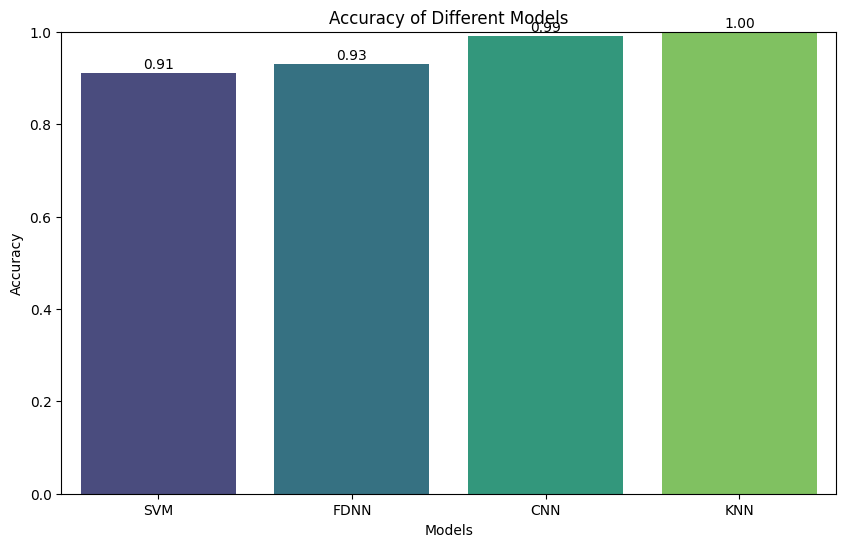

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
elements = ['SVM', 'FDNN', 'CNN', 'KNN']
accuracies = [0.91, 0.93, 0.99, 1]

def plot_histogram(elements, accuracies):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=elements, y=accuracies, palette="viridis")
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Accuracy of Different Models')
    plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
    for index, value in enumerate(accuracies):
        plt.text(index, value + 0.01, f"{value:.2f}", ha='center')
    plt.show()

# Call the function to plot the histogram
plot_histogram(elements, accuracies)
